# Лабораторная работа 8

In [2]:
import numpy as np

KNN

In [3]:
def get_neighbors(X_train, y_train, X_test, k):
    distances = [(y_train[i], np.linalg.norm(X_train[i] - X_test))
                 for i in range(len(X_train))]
    distances.sort(key=lambda x: x[1])
    neighbors = [distances[i][0] for i in range(k)]
    return neighbors

def vote(neighbors):
    count = {}
    for i in neighbors:
        if i in count:
            count[i] += 1
        else:
            count[i] = 1
    ans = max(count.items(), key=lambda x: x[1])[0]
    return ans

def accuracy(y_test, y_pred):
    correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            correct += 1
    return correct / len(y_test)

def knn(X_train, X_test, y_train, y_test, k):
    y_pred = []
    for x in range(len(X_test)):
        neighbors = get_neighbors(X_train, y_train, X_test, k)
        result = vote(neighbors)
        y_pred.append(result)
    if len(y_test) > 0:
        acc = accuracy(y_test, y_pred)
        print(f"accuracy: {acc}")
    return y_pred

In [20]:
X_train = np.array([[6, 180, 12],
                    [5.92, 190, 11],
                    [5.58, 170, 12],
                    [5.92, 165, 10],
                    [5, 100, 6],
                    [5.5, 150, 8],
                    [5.42, 130, 7],
                    [5.75, 150, 9]])
y_train = ["муж", "муж", "муж", "муж", "жен", "жен", "жен", "жен"]
X_test = np.array([[6, 130, 8]])
res = knn(X_train, X_test, y_train, [], 3)
print(res)

['жен']




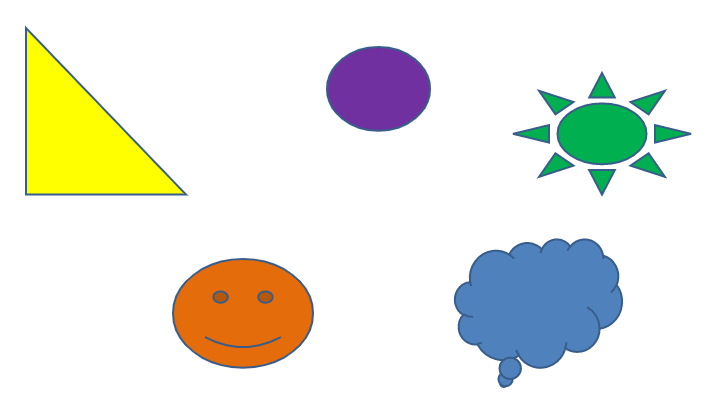

Тест:

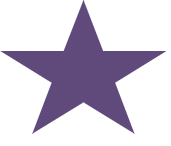

In [27]:
t = [0,3,1,0,0] # 0 
o = [4,0,1,1,1] # 1
c = [2,24,9,1,1] # 2
p = [1,0,4,1,0] # 3
ob = [3,0,4,0,0] # 4
star = [4,10,1,1,0]
X_train = np.array([
    t,
    o,
    c,
    p,
    ob
])
# simple - 0134 hard - 2
y_train = ["hard", "simple", "hard", "simple", "simple"]
X_test = np.array([star])
res = knn(X_train, X_test, y_train, [], 2)
print(res)

['hard']


NBA

In [26]:
class NaiveBayes:
    def __init__(self, X, y):
        self.num_examples, self.num_features = X.shape
        self.classes = np.unique(y)
        self.num_classes = len(self.classes)
        self.y = y
        self.eps = 1e-6
        self.mean = np.zeros((self.num_classes, self.num_features))
        self.variance = np.zeros((self.num_classes, self.num_features))
        self.prior = np.zeros(self.num_classes)

    def fit(self, X):
        for i, class_name in enumerate(self.classes):
            X_c = X[class_name == self.y]
            self.mean[i, :] = np.mean(X_c, axis=0)
            self.variance[i, :] = np.var(X_c, axis=0)
            self.prior[i] = X_c.shape[0] / X.shape[0]
    
    def predict(self, X):
        posteriors = []

        for i in range(self.num_classes):
            prior = np.log(self.prior[i])
            post = np.sum(np.log(self.post(i, X)))
            post += prior
            posteriors.append(post)
        # for i in range(self.num_classes):
        #     prior = self.prior[i]
        #     post = np.prod(self.post(i, X))
        #     post *= prior
        #     posteriors.append(post)
        return self.classes[np.argmax(posteriors)]

    def post(self, class_id, X):
        mean = self.mean[class_id]
        var = self.variance[class_id]
        ans = np.exp(-((X-mean)**2) / (2 * var)) / np.sqrt(2 * np.pi * var)
        return ans

In [27]:
X_train = np.array([[6, 180, 12],
                    [5.92, 190, 11],
                    [5.58, 170, 12],
                    [5.92, 165, 10],
                    [5, 100, 6],
                    [5.5, 150, 8],
                    [5.42, 130, 7],
                    [5.75, 150, 9]])
y_train = np.array(["муж", "муж", "муж", "муж", "жен", "жен", "жен", "жен"])
X_test = np.array([[6, 130, 8]])
NB = NaiveBayes(X_train, y_train)
NB.fit(X_train)
y_pred = NB.predict(X_test)
print(y_pred)

жен


In [28]:
%%capture --no-display

t = [0,3,1,0,0] # 0 
o = [4,0,1,1,1] # 1
c = [2,24,9,1,1] # 2
p = [1,0,4,1,0] # 3
ob = [3,0,4,0,0] # 4
star = [4,10,1,1,0]
X_train = np.array([
    t,
    o,
    c,
    p,
    ob
])
# simple - 0134 hard - 2
y_train = np.array(["simple", "simple", "hard", "simple", "simple"])
X_test = np.array([star])
NB = NaiveBayes(X_train, y_train)
NB.fit(X_train)
y_pred = NB.predict(X_test)
y_pred

'hard'